In [1]:
import pandas as pd
import seaborn as sns
# import pycaret

In [2]:
df = pd.read_csv("./archive/International wheat production statistics.csv",index_col="Unnamed: 0")

In [3]:
df.head()

,Country,2020[1],2019[1],2018[1],2017[1],2016[1],2015[2],2014[3],2013[4],2012[5],...,2005 [6],2004[6],2003[6],2002,2001,2000,1999,1998,1997,1996
0,China,134.3,133.6,131.4,134.3,131.7,130.2,126.2,121.7,125.6,...,96.3,91.6,86.5,90.3,93.9,99.7,113.9,109.7,123.3,110.6
1,India,107.6,103.6,99.7,98.5,93.5,86.5,94.5,93.5,94.9,...,72.0,72.1,65.1,72.8,69.7,76.4,70.8,65.9,69.4,62.6
2,Russia,85.9,74.5,72.1,85.9,73.3,61.8,59.7,52.1,37.7,...,47.6,45.4,34.1,50.6,47.0,34.5,31.0,27.0,44.3,34.9
3,United States,49.7,52.3,51.3,47.3,62.9,55.8,55.4,60.0,61.8,...,57.1,58.7,63.8,44.1,53.3,60.8,62.7,69.4,67.5,62.0
4,Canada,35.2,32.3,31.8,30.0,30.5,27.6,29.3,37.5,27.0,...,25.6,25.9,23.6,16.2,20.6,26.8,26.9,24.1,24.3,29.8


In [4]:
# clean column names
df.columns = ["Country"] + [col[:4] for col in df.columns[1:]]

In [5]:
df.head()

,Country,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996
0,China,134.3,133.6,131.4,134.3,131.7,130.2,126.2,121.7,125.6,...,96.3,91.6,86.5,90.3,93.9,99.7,113.9,109.7,123.3,110.6
1,India,107.6,103.6,99.7,98.5,93.5,86.5,94.5,93.5,94.9,...,72.0,72.1,65.1,72.8,69.7,76.4,70.8,65.9,69.4,62.6
2,Russia,85.9,74.5,72.1,85.9,73.3,61.8,59.7,52.1,37.7,...,47.6,45.4,34.1,50.6,47.0,34.5,31.0,27.0,44.3,34.9
3,United States,49.7,52.3,51.3,47.3,62.9,55.8,55.4,60.0,61.8,...,57.1,58.7,63.8,44.1,53.3,60.8,62.7,69.4,67.5,62.0
4,Canada,35.2,32.3,31.8,30.0,30.5,27.6,29.3,37.5,27.0,...,25.6,25.9,23.6,16.2,20.6,26.8,26.9,24.1,24.3,29.8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  42 non-null     object 
 1   2020     42 non-null     float64
 2   2019     42 non-null     object 
 3   2018     42 non-null     object 
 4   2017     42 non-null     object 
 5   2016     42 non-null     object 
 6   2015     42 non-null     object 
 7   2014     42 non-null     object 
 8   2013     42 non-null     object 
 9   2012     42 non-null     object 
 10  2011     42 non-null     object 
 11  2010     42 non-null     float64
 12  2009     42 non-null     float64
 13  2008     42 non-null     float64
 14  2007     42 non-null     float64
 15  2006     42 non-null     float64
 16  2005     42 non-null     float64
 17  2004     42 non-null     float64
 18  2003     42 non-null     float64
 19  2002     42 non-null     float64
 20  2001     42 non-null     float64
 21  2000     42 non-nu

In [7]:
df_object = df.select_dtypes(include=['object'])
df_object_modified = df_object.assign(**df_object.apply(lambda x: x.str.split('[').str[0]))
df_modified = df.drop(df_object.columns, axis=1).merge(df_object_modified, left_index=True, right_index=True)

In [8]:
dff = df_modified.reindex_like(df)

In [9]:
dff.head()

,Country,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996
0,China,134.3,133.6,131.4,134.3,131.7,130.2,126.2,121.7,125.6,...,96.3,91.6,86.5,90.3,93.9,99.7,113.9,109.7,123.3,110.6
1,India,107.6,103.6,99.7,98.5,93.5,86.5,94.5,93.5,94.9,...,72.0,72.1,65.1,72.8,69.7,76.4,70.8,65.9,69.4,62.6
2,Russia,85.9,74.5,72.1,85.9,73.3,61.8,59.7,52.1,37.7,...,47.6,45.4,34.1,50.6,47.0,34.5,31.0,27.0,44.3,34.9
3,United States,49.7,52.3,51.3,47.3,62.9,55.8,55.4,60.0,61.8,...,57.1,58.7,63.8,44.1,53.3,60.8,62.7,69.4,67.5,62.0
4,Canada,35.2,32.3,31.8,30.0,30.5,27.6,29.3,37.5,27.0,...,25.6,25.9,23.6,16.2,20.6,26.8,26.9,24.1,24.3,29.8


In [10]:
dff.to_csv("wheat_production_parsed.csv",index=False)

In [11]:
dff.sort_values(by='Country')

,Country,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996
24,Afghanistan,5.2,4.9,3.6,4.3,4.6,4.7,5.4,5.2,5.1,...,4.3,2.3,3.5,2.7,1.6,1.5,2.5,2.8,2.7,2.3
31,Algeria,3.1,3.9,4.0,2.4,2.4,2.7,2.4,3.2,3.4,...,2.4,2.7,3.0,1.5,2.0,0.8,1.5,2.3,0.7,3.0
10,Argentina,19.8,19.5,18.5,18.4,18.6,11.6,13.9,8.0,11.0,...,16.0,14.6,14.5,12.3,15.4,16.5,15.7,11.5,14.8,15.9
12,Australia,14.5,17.6,20.9,31.8,22.3,23.7,25.3,22.9,29.9,...,25.1,21.9,26.1,10.1,24.3,18.5,24.1,22.1,19.4,23.7
35,Belarus,2.8,2.3,1.8,2.6,2.3,2.9,2.9,2.1,2.6,...,1.2,1.1,0.8,1.0,0.9,1.0,0.7,0.8,0.7,0.6
20,Brazil,6.3,5.6,5.4,4.3,6.8,5.5,6.3,5.7,4.4,...,5.2,5.7,6.2,3.1,3.4,1.7,2.5,2.3,2.5,3.3
27,Bulgaria,4.9,6.3,5.8,6.1,5.7,5.0,5.3,5.1,4.3,...,3.5,4.0,2.0,4.1,4.1,3.3,3.2,3.3,3.6,1.8
4,Canada,35.2,32.3,31.8,30.0,30.5,27.6,29.3,37.5,27.0,...,25.6,25.9,23.6,16.2,20.6,26.8,26.9,24.1,24.3,29.8
0,China,134.3,133.6,131.4,134.3,131.7,130.2,126.2,121.7,125.6,...,96.3,91.6,86.5,90.3,93.9,99.7,113.9,109.7,123.3,110.6
26,Czechia,4.9,4.8,4.4,4.7,5.5,5.3,5.4,4.7,3.5,...,4.5,5.0,2.6,3.9,4.5,4.1,4.0,3.8,3.6,3.7


In [12]:
dff.iloc[:,1:] = dff.iloc[:,1:].apply(lambda x: x.astype(float))

C:\Users\91978\AppData\Local\Temp\ipykernel_16580\2663723825.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dff.iloc[:,1:] = dff.iloc[:,1:].apply(lambda x: x.astype(float))


In [13]:
dff.head()

,Country,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996
0,China,134.3,133.6,131.4,134.3,131.7,130.2,126.2,121.7,125.6,...,96.3,91.6,86.5,90.3,93.9,99.7,113.9,109.7,123.3,110.6
1,India,107.6,103.6,99.7,98.5,93.5,86.5,94.5,93.5,94.9,...,72.0,72.1,65.1,72.8,69.7,76.4,70.8,65.9,69.4,62.6
2,Russia,85.9,74.5,72.1,85.9,73.3,61.8,59.7,52.1,37.7,...,47.6,45.4,34.1,50.6,47.0,34.5,31.0,27.0,44.3,34.9
3,United States,49.7,52.3,51.3,47.3,62.9,55.8,55.4,60.0,61.8,...,57.1,58.7,63.8,44.1,53.3,60.8,62.7,69.4,67.5,62.0
4,Canada,35.2,32.3,31.8,30.0,30.5,27.6,29.3,37.5,27.0,...,25.6,25.9,23.6,16.2,20.6,26.8,26.9,24.1,24.3,29.8


In [14]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  42 non-null     object 
 1   2020     42 non-null     float64
 2   2019     42 non-null     float64
 3   2018     42 non-null     float64
 4   2017     42 non-null     float64
 5   2016     42 non-null     float64
 6   2015     42 non-null     float64
 7   2014     42 non-null     float64
 8   2013     42 non-null     float64
 9   2012     42 non-null     float64
 10  2011     42 non-null     float64
 11  2010     42 non-null     float64
 12  2009     42 non-null     float64
 13  2008     42 non-null     float64
 14  2007     42 non-null     float64
 15  2006     42 non-null     float64
 16  2005     42 non-null     float64
 17  2004     42 non-null     float64
 18  2003     42 non-null     float64
 19  2002     42 non-null     float64
 20  2001     42 non-null     float64
 21  2000     42 non-nu

In [15]:
dff.to_csv("./wheat_production_parsed.csv",index=False)

In [16]:
df_transformed = dff.melt(id_vars=["Country"], value_vars=dff.columns[1:], var_name="Year", value_name="WheatProduced(MT)")

In [18]:
df_transformed.head(30)

,Country,Year,WheatProduced(MT)
0,China,2020,134.3
1,India,2020,107.6
2,Russia,2020,85.9
3,United States,2020,49.7
4,Canada,2020,35.2
5,France,2020,30.1
6,Pakistan,2020,25.2
7,Ukraine,2020,24.9
8,Germany,2020,22.2
9,Turkey,2020,20.5


In [21]:
df_transformed.to_csv("country_wise_wheat_produced.csv",index=False)

In [20]:
df_transformed['Year'] = pd.to_datetime(df_transformed.Year).dt.year

In [95]:
test = df_transformed.loc[df_transformed.Year > 2015]
train = df_transformed.loc[df_transformed.Year <= 2015]

In [99]:
train.head()

,Country,Year,WheatProduced(MT)
210,China,2015,130.2
211,India,2015,86.5
212,Russia,2015,61.8
213,United States,2015,55.8
214,Canada,2015,27.6


In [98]:
test.head()

,Country,Year,WheatProduced(MT)
0,China,2020,134.3
1,India,2020,107.6
2,Russia,2020,85.9
3,United States,2020,49.7
4,Canada,2020,35.2


In [105]:
indiaDf = df_transformed.loc[df_transformed.Country == "India"]

In [106]:
indiaDf.head()

,Country,Year,WheatProduced(MT)
1,India,2020,107.6
43,India,2019,103.6
85,India,2018,99.7
127,India,2017,98.5
169,India,2016,93.5


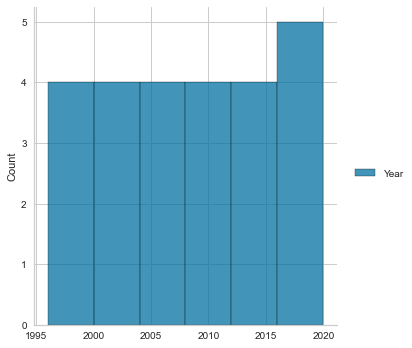

# Time Series Forecasting

In [114]:
import xgboost

In [116]:
model = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=1000)